## Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from __future__ import division
import os
import sys
from sklearn.metrics import precision_score, recall_score
import glob
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import sys
'''importing the libraries'''

from tensorflow.keras.models import Sequential
import os 
from keras.layers import LeakyReLU
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline
from tqdm.notebook import tqdm, trange
# Importing libraries
from keras.layers import Dropout, BatchNormalization
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
import pandas as pd
#from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import imblearn
import numpy as np
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn import linear_model
from tqdm import tqdm, trange
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn import linear_model
from tqdm import tqdm, trange
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import warnings
import math
import statsmodels
import numpy as np
from scipy import stats
import statsmodels.api as smf
import numpy as np
import pandas as pd
import arviz
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline
%precision 4
plt.style.use('ggplot')
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import Lasso
from sklearn import linear_model
from tqdm.notebook import tqdm, trange
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
import patsy
from theano import shared

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
! pip install mrmr_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.6 MB/s 


## Uploading Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ML2/Dataset.xlsx')



## Functions

In [ ]:
def firth_likelihood(beta, logit):
    return -(logit.loglike(beta) + 0.5*np.log(np.linalg.det(-logit.hessian(beta))))

# Do firth regression
# Note information = -hessian, for some reason available but not implemented in statsmodels
def fit_firth(y, X, start_vec=None, step_limit=10000, convergence_limit=0.0001):

    logit_model = smf.Logit(y, X)
    
    if start_vec is None:
        start_vec = np.zeros(X.shape[1])
    
    beta_iterations = []
    beta_iterations.append(start_vec)
    for i in range(0, step_limit):
        pi = logit_model.predict(beta_iterations[i])
        W = np.diagflat(np.multiply(pi, 1-pi))
        var_covar_mat = np.linalg.pinv(-logit_model.hessian(beta_iterations[i]))

        # build hat matrix
        rootW = np.sqrt(W)
        H = np.dot(np.transpose(X), np.transpose(rootW))
        H = np.matmul(var_covar_mat, H)
        H = np.matmul(np.dot(rootW, X), H)

        # penalised score
        U = np.matmul(np.transpose(X), y - pi + np.multiply(np.diagonal(H), 0.5 - pi))
        new_beta = beta_iterations[i] + np.matmul(var_covar_mat, U)

        # step halving
        j = 0
        while firth_likelihood(new_beta, logit_model) > firth_likelihood(beta_iterations[i], logit_model):
            new_beta = beta_iterations[i] + 0.5*(new_beta - beta_iterations[i])
            j = j + 1
            if (j > step_limit):
                sys.stderr.write('Firth regression failed\n')
                return None

        beta_iterations.append(new_beta)
        if i > 0 and (np.linalg.norm(beta_iterations[i] - beta_iterations[i-1]) < convergence_limit):
            break

    return_fit = None
    if np.linalg.norm(beta_iterations[i] - beta_iterations[i-1]) >= convergence_limit:
        sys.stderr.write('Firth regression failed\n')
    else:
        # Calculate stats
        fitll = -firth_likelihood(beta_iterations[-1], logit_model)
        intercept = beta_iterations[-1][0]
        beta = beta_iterations[-1][1:].tolist()
        bse = np.sqrt(np.diagonal(np.linalg.pinv(-logit_model.hessian(beta_iterations[-1]))))
        
        return_fit = intercept, beta, bse, fitll

    return return_fit

def get_predictions(X,weights):
    z = np.dot(X,weights)
    y_pred =  1/(1 + np.exp(-z))
    return y_pred

def scaled_df (df):
  scaler = StandardScaler()
  scaler.fit(df.iloc[:,:df.shape[1]-1])
  df_s = scaler.transform(df.iloc[:,:df.shape[1]-1])
  df_s = pd.DataFrame(df_s)
  df_s['target'] = df['in_hospital_mortality']
  return df_s

def data_split(df,split_ratio = 0.20):
  df0 = df.copy()
#df
  df0 = df0.sample(frac = 1)

  data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
  data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

  X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = split_ratio ,random_state=45,stratify=data_Y)
  return X_train, X_test, Y_train, Y_test, data_X, data_Y

def intercept_df(df):
  #d = df
  df_i = df.copy()
  df_i.insert(loc=1, column='intercept', value=np.ones(df.shape[0],dtype = 'int'), allow_duplicates=True)
  return df_i

def over_sample_(df):
  df0 = df.copy()
  df0 = df0.sample(frac = 1)

  data_X = df0.iloc[:-500,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
  data_Y =  df0.iloc[:-500,len(df0.columns)-1] # target variable only

  data_Vx =  df0.iloc[500:, 0: len(df0.columns)-1]
  data_Vy = df0.iloc[500:,len(df0.columns)-1]

  oversample = SMOTE()
  X, y = oversample.fit_resample(data_X, data_Y)

  X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
  return  X_train, X_test, Y_train, Y_test,data_Vx,data_Vy

## Feature Selection

### Ridge

In [ ]:
df0 = df
#df
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=44,stratify=data_Y)

In [ ]:
#param = {'C': [10**-2,10**-1,10**0,10**1,10**2,1,2,100]}

lr_model = LogisticRegression(penalty='l2', solver='saga')
#g#s_model = GridSearchCV(estimator=lr_model, param_grid=param)
#gs_model.fit(X_train, Y_train)

# Train a LR model with best parameters
model = LogisticRegression(C= 1, penalty='l2', solver='saga')
model.fit(X_train, Y_train)
coef = model.coef_[0]
imp_features = pd.Series(X_train.columns)[list(coef!=0)]
importance = pd.Series(coef)[list(coef!=0)]
imp_ridge  = pd.DataFrame({'features':imp_features,'imp':importance})
imp_ridge

In [ ]:
# ridge feature vector 
imp_ridge.to_csv('ridge.csv',index = False)

In [ ]:
df_ridge = df.loc[:,imp_features]
df_ridge['target'] = df['in_hospital_mortality']
# scaling with ridge features
scaler = StandardScaler()
scaler.fit(df_ridge.iloc[:,:df_ridge.shape[1]-1])
df_s = scaler.transform(df_ridge.iloc[:,:df_ridge.shape[1]-1])
df_s = pd.DataFrame(df_s)
df_s['target'] = df['in_hospital_mortality']

# getting f-1 score with ridge feature vector
df0 = df_s
#df
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=44,stratify=data_Y)

model = XGBClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print(f1_score(Y_test,pred))
print(f1_score(Y_test,pred, average = 'macro'))
print(f1_score(Y_test,pred, average = 'weighted'))

0.2222222222222222
0.6044634377967711
0.9652905796696647


### Lasso FS

In [ ]:
df0 = df
#df
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=44,stratify=data_Y)

In [ ]:
#param = {'C': [10**-2,10**-1,10**0,10**1,10**2,1,2,100]}

lr_model = LogisticRegression(penalty='l1', solver='saga')
#g#s_model = GridSearchCV(estimator=lr_model, param_grid=param)
#gs_model.fit(X_train, Y_train)

# Train a LR model with best parameters
model = LogisticRegression(C= 1, penalty='l1', solver='saga')
model.fit(X_train, Y_train)
coef = model.coef_[0]
imp_features = pd.Series(X_train.columns)[list(coef!=0)]
importance = pd.Series(coef)[list(coef!=0)]
imp_lasso  = pd.DataFrame({'features':imp_features,'imp':importance})
imp_lasso

In [ ]:
# ridge feature vector 
imp_lasso.to_csv('lasso.csv',index = False)

In [ ]:
df_lasso = df.loc[:,imp_features]
df_lasso['target'] = df['in_hospital_mortality']
# scaling with lasso features
scaler = StandardScaler()
scaler.fit(df_lasso.iloc[:,:df_lasso.shape[1]-1])
df_s = scaler.transform(df_lasso.iloc[:,:df_lasso.shape[1]-1])
df_s = pd.DataFrame(df_s)
df_s['target'] = df['in_hospital_mortality']

# getting f-1 score with lasso feature vector
df0 = df_s
#df
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=44,stratify=data_Y)

model = XGBClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print(f1_score(Y_test,pred))
print(f1_score(Y_test,pred, average = 'macro'))
print(f1_score(Y_test,pred, average = 'weighted'))

### XGB FS

In [ ]:
df0 = df
#df
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=44,stratify=data_Y)

In [ ]:
#X_train, X_test, Y_train, Y_test, data_X,data_Y = train_test_split(df_s)
model = XGBClassifier()
model.fit(X_train, Y_train)
model

XGBClassifier()

In [ ]:
xgb_fea_imp=pd.DataFrame(list(model.get_booster().get_fscore().items()),columns=['feature','importance']).sort_values('importance', ascending=False)
xgb_fea_imp

In [ ]:
# XGB feature vector
xgb_fea_imp.to_csv('xgb_fs.csv', index = False)

In [ ]:
df_xgb = df.loc[:,imp_features]
df_xgb['target'] = df['in_hospital_mortality']
# scaling with XGB features
scaler = StandardScaler()
scaler.fit(df_xgb.iloc[:,:df_xgb.shape[1]-1])
df_s = scaler.transform(df_xgb.iloc[:,:df_xgb.shape[1]-1])
df_s = pd.DataFrame(df_s)
df_s['target'] = df['in_hospital_mortality']

# getting f-1 score with XGB feature vector
df0 = df_s
#df
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=44,stratify=data_Y)

model = XGBClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print(f1_score(Y_test,pred))
print(f1_score(Y_test,pred, average = 'macro'))
print(f1_score(Y_test,pred, average = 'weighted'))

### RF FS

In [ ]:
df0 = df
#df
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=44,stratify=data_Y)

In [ ]:

#rf = SelectFromModel(RandomForestClassifier(n_estimators = 1000), max_features = 20, threshold = -np.inf )
model = RandomForestClassifier(n_estimators=2000)
model.fit(X_train,Y_train)
feature_importances_rf = pd.DataFrame(model.feature_importances_, index =data_X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances_rf

In [ ]:
feature_importances_rf.index

In [ ]:
# random forest feature vector
feature_importances_rf.to_csv('rf_feat.csv')

In [ ]:
#df_xgb = df.loc[:,xgb_fea_imp.feature.values.tolist()]
df_rf = df.loc[:,feature_importances_rf.index.values.tolist()]

In [ ]:
#scaler = StandardScaler()
#scaler.fit(df_xgb.iloc[:,:df_xgb.shape[1]-1])
#df_s = scaler.transform(df_xgb.iloc[:,:df_xgb.shape[1]-1])
#df_s = pd.DataFrame(df_s)
#df_s['target'] = df['in_hospital_mortality']
df_rf['target'] = df['in_hospital_mortality']
scaler = StandardScaler()
scaler.fit(df_rf.iloc[:,:df_rf.shape[1]-1])
df_s = scaler.transform(df_rf.iloc[:,:df_rf.shape[1]-1])
df_s = pd.DataFrame(df_s)
df_s['target'] = df['in_hospital_mortality']

In [ ]:
df0 = df_s
#df
df0 = df0.sample(frac = 1)

data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=44,stratify=data_Y)

In [ ]:
# getting f-1 score with random forest feature vector
model = RandomForestClassifier()
model.fit(X_train, Y_train)
pred = model.predict(X_test)
print(f1_score(Y_test,pred))
print(f1_score(Y_test,pred, average = 'macro'))
print(f1_score(Y_test,pred, average = 'weighted'))
#print(f1)

0.23529411764705882
0.6114800759013282
0.9665911905559188


In [ ]:
f = pd.read_csv('rf_feat.csv')

In [ ]:
def firth_likelihood(beta, logit):
    return -(logit.loglike(beta) + 0.5*np.log(np.linalg.det(-logit.hessian(beta))))

# Do firth regression
# Note information = -hessian, for some reason available but not implemented in statsmodels
def fit_firth(y, X, start_vec=None, step_limit=10000, convergence_limit=0.0001):

    logit_model = smf.Logit(y, X)
    
    if start_vec is None:
        start_vec = np.zeros(X.shape[1])
    
    beta_iterations = []
    beta_iterations.append(start_vec)
    for i in range(0, step_limit):
        pi = logit_model.predict(beta_iterations[i])
        W = np.diagflat(np.multiply(pi, 1-pi))
        var_covar_mat = np.linalg.pinv(-logit_model.hessian(beta_iterations[i]))

        # build hat matrix
        rootW = np.sqrt(W)
        H = np.dot(np.transpose(X), np.transpose(rootW))
        H = np.matmul(var_covar_mat, H)
        H = np.matmul(np.dot(rootW, X), H)

        # penalised score
        U = np.matmul(np.transpose(X), y - pi + np.multiply(np.diagonal(H), 0.5 - pi))
        new_beta = beta_iterations[i] + np.matmul(var_covar_mat, U)

        # step halving
        j = 0
        while firth_likelihood(new_beta, logit_model) > firth_likelihood(beta_iterations[i], logit_model):
            new_beta = beta_iterations[i] + 0.5*(new_beta - beta_iterations[i])
            j = j + 1
            if (j > step_limit):
                sys.stderr.write('Firth regression failed\n')
                return None

        beta_iterations.append(new_beta)
        if i > 0 and (np.linalg.norm(beta_iterations[i] - beta_iterations[i-1]) < convergence_limit):
            break

    return_fit = None
    if np.linalg.norm(beta_iterations[i] - beta_iterations[i-1]) >= convergence_limit:
        sys.stderr.write('Firth regression failed\n')
    else:
        # Calculate stats
        fitll = -firth_likelihood(beta_iterations[-1], logit_model)
        intercept = beta_iterations[-1][0]
        beta = beta_iterations[-1][1:].tolist()
        bse = np.sqrt(np.diagonal(np.linalg.pinv(-logit_model.hessian(beta_iterations[-1]))))
        
        return_fit = intercept, beta, bse, fitll

    return return_fit

def get_predictions(X,weights):
    z = np.dot(X,weights)
    y_pred =  1/(1 + np.exp(-z))
    return y_pred

def scaled_df (df):
  scaler = StandardScaler()
  scaler.fit(df.iloc[:,:df.shape[1]-1])
  df_s = scaler.transform(df.iloc[:,:df.shape[1]-1])
  df_s = pd.DataFrame(df_s)
  y = df['mret']
  return df_s,y

def data_split(df,y,split_ratio = 0.20):
  df0 = df.copy()
#df
  df0 = df0.sample(frac = 1)

  data_X = df0.iloc[:,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
  data_Y =  df0.iloc[:,len(df0.columns)-1] # target variable only

  X_train, X_test, Y_train, Y_test = train_test_split(df, y,test_size = split_ratio ,random_state=45,stratify=y)
  return X_train, X_test, Y_train, Y_test, data_X, data_Y

def intercept_df(df):
  #d = df
  df_i = df.copy()
  df_i.insert(loc=1, column='intercept', value=np.ones(df.shape[0],dtype = 'int'), allow_duplicates=True)
  return df_i

def over_sample_(df):
  df0 = df.copy()
  df0 = df0.sample(frac = 1)

  data_X = df0.iloc[:-500,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
  data_Y =  df0.iloc[:-500,len(df0.columns)-1] # target variable only

  data_Vx =  df0.iloc[500:, 0: len(df0.columns)-1]
  data_Vy = df0.iloc[500:,len(df0.columns)-1]

  oversample = SMOTE()
  X, y = oversample.fit_resample(data_X, data_Y)

  X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42,stratify = data_Y)
  return  X_train, X_test, Y_train, Y_test,data_Vx,data_Vy

In [ ]:
df0 = df_i.copy()
data_X = df0.iloc[:-500,0:len(df0.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df0.iloc[:-500,len(df0.columns)-1] # target variable only

data_Vx =  df0.iloc[500:, 0: len(df0.columns)-1]
data_Vy = df0.iloc[500:,len(df0.columns)-1]

oversample = SMOTE()
X, y = oversample.fit_resample(data_X, data_Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
data_Y.shape

(4852,)

## Code

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML2 Project/preop_.csv', low_memory = False)
# original df
df
# Make a scaled df
scaler = StandardScaler()
scaler.fit(df.iloc[:,:df.shape[1]-1])
df_s = scaler.transform(df.iloc[:,:df.shape[1]-1])
df_s = pd.DataFrame(df_s)
df_s['target'] = df['in_hospital_mortality']
# Make df with intercept column
df_i = intercept_df(df_s)
#df_i = intercept_df(df)
# Train test split
X_train, X_test, Y_train, Y_test,data_X,data_Y = data_split(df_i, 0.20)
#print(X_train.shape)
# fit firth logistic
(intercept, beta, bse, fitll) = fit_firth(Y_train, X_train)
b = beta
beta = [intercept] + beta
# Use beta for prediciton
yp = get_predictions(X_test,beta)
# ROC
print(roc_auc_score(Y_test,yp))

0.8570925392251041


## Visualization

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


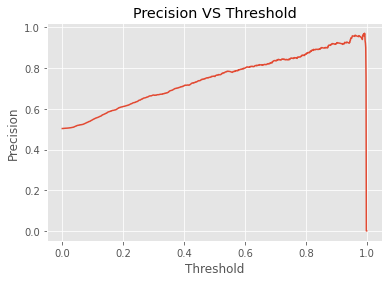

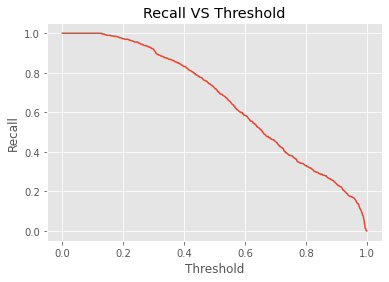

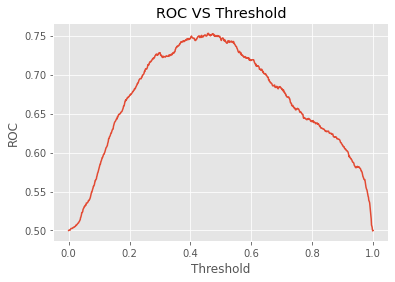

In [ ]:
thr = np.linspace(0,1,1000)
precision = []
recall = []
roc = []
for i in thr:
  temp = p >= i
  temp = temp.astype('int')
  precision.append(precision_score(Y_test,temp))
  recall.append(recall_score(Y_test,temp))
  roc.append(roc_auc_score(Y_test,temp))

plt.plot(thr,precision)
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision VS Threshold')
plt.show()
plt.plot(thr,recall)
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall VS Threshold')
plt.show()
plt.plot(thr,roc)
plt.xlabel('Threshold')
plt.ylabel('ROC')
plt.title('ROC VS Threshold')
plt.show()